# Project : Text Emotion Recognition System

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


## Data Loading

In [4]:
data = pd.read_csv('train.txt' , header = None , sep = ';' , names = ['Comment' , 'Emotion'])

In [5]:
data['length'] = [len(x) for x in data['Comment']]

In [6]:
data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [7]:
data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.shape

(15999, 3)

## Data Expolarion 

In [11]:
# Count of rows associated with Emotions different emotions
data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

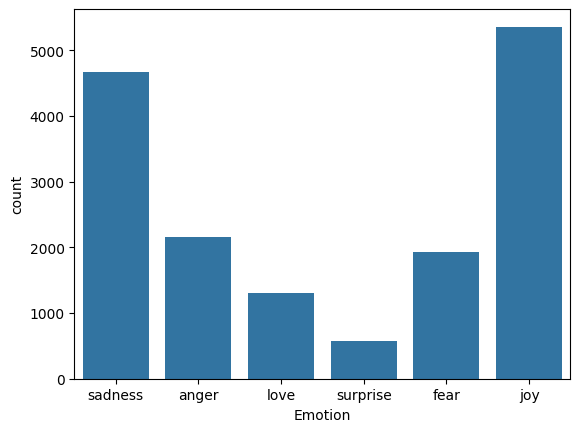

In [12]:
sns.countplot(x = data['Emotion'])

In [13]:
emotions_list = data['Emotion'].unique()

In [14]:
data['length'].values

array([ 23, 108,  48, ...,  30,  59,  62], dtype=int64)

## EDA

In [16]:
from wordcloud import WordCloud

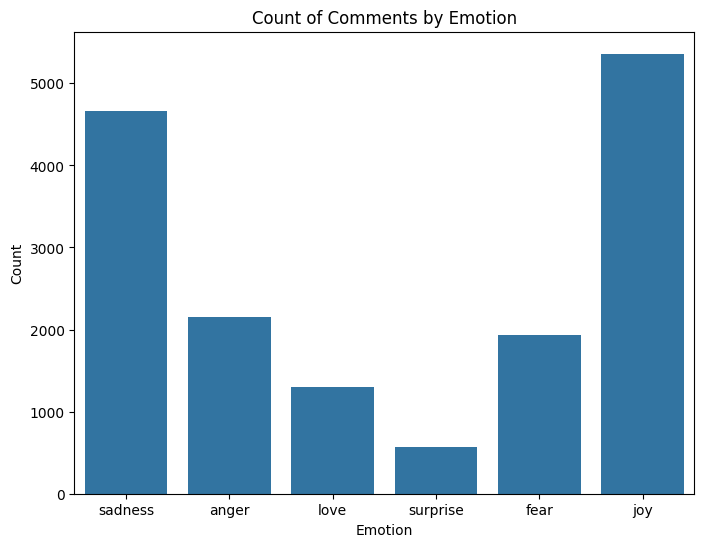

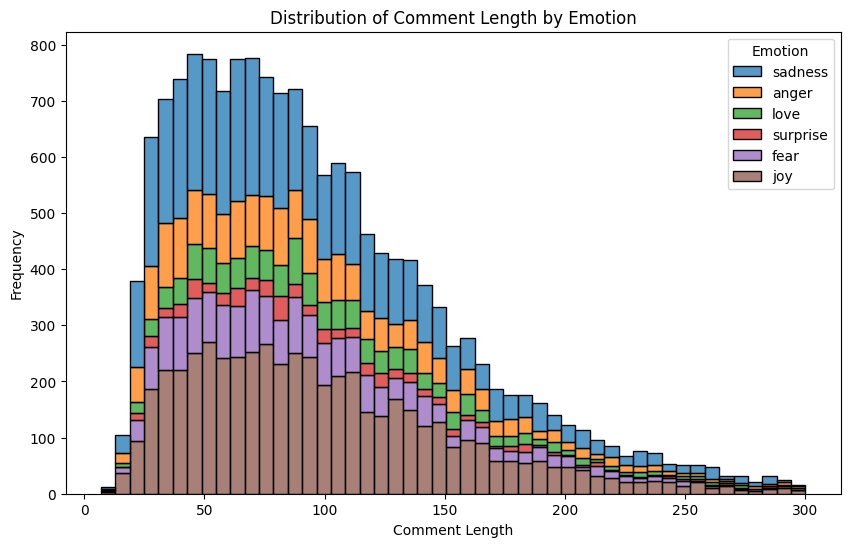

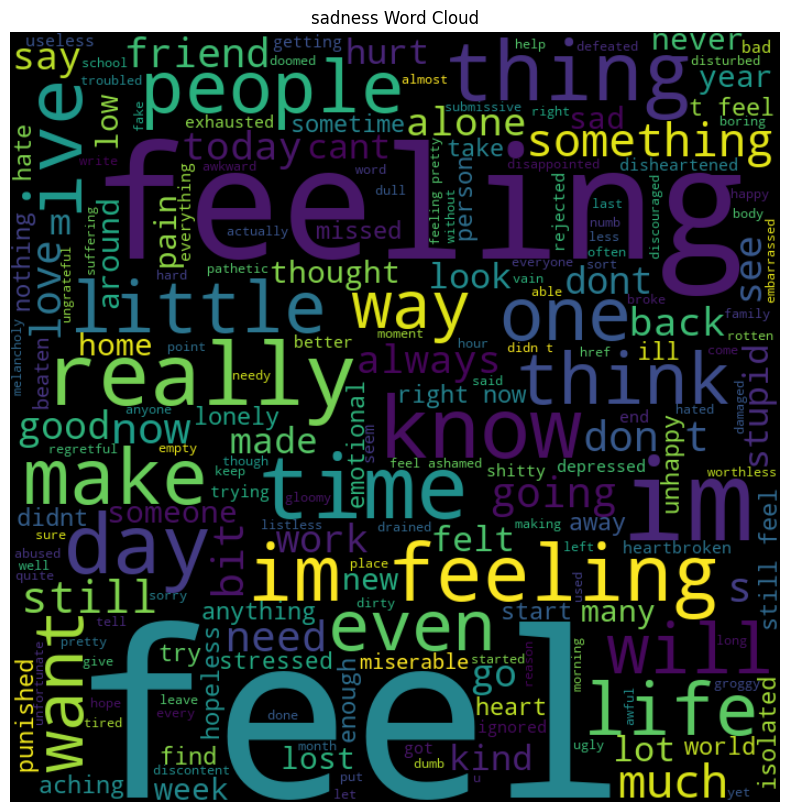

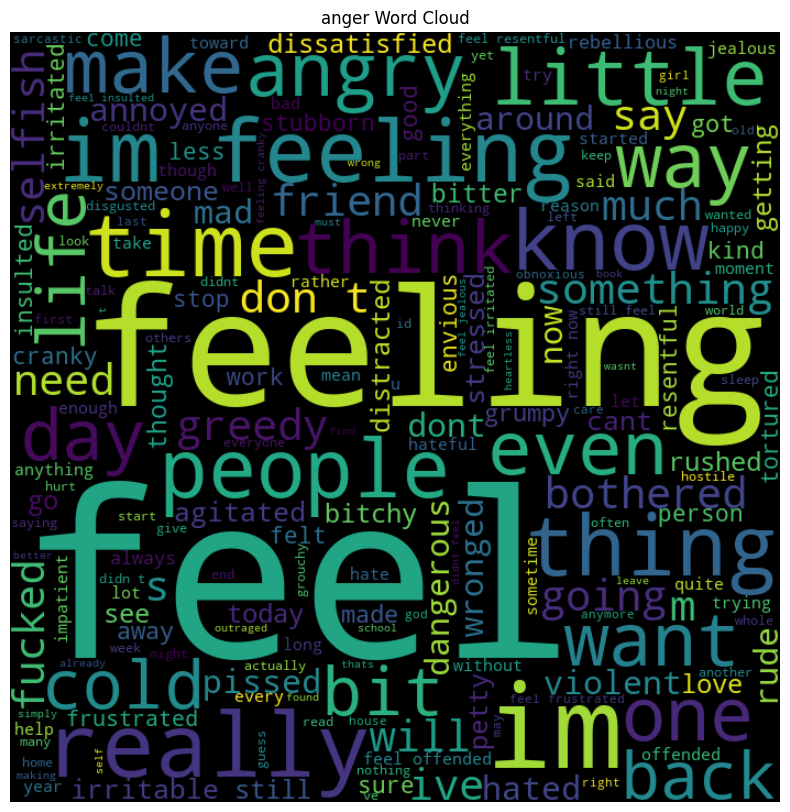

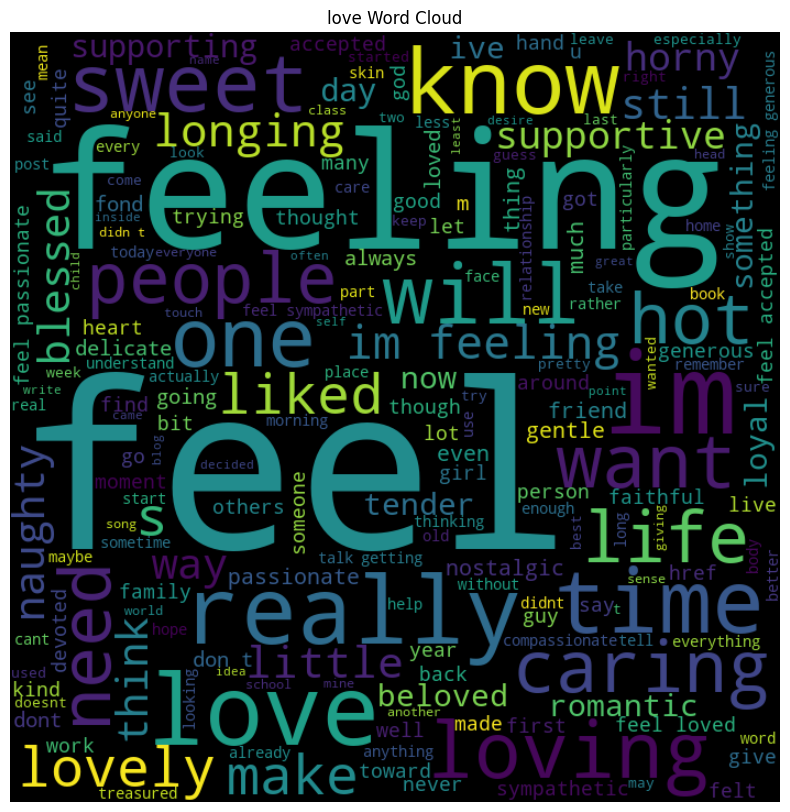

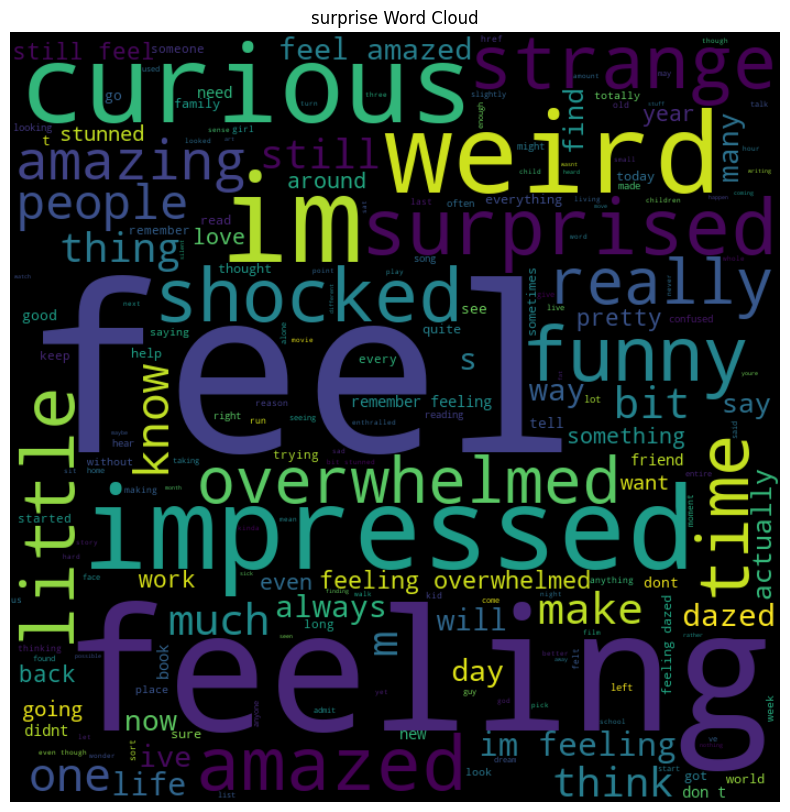

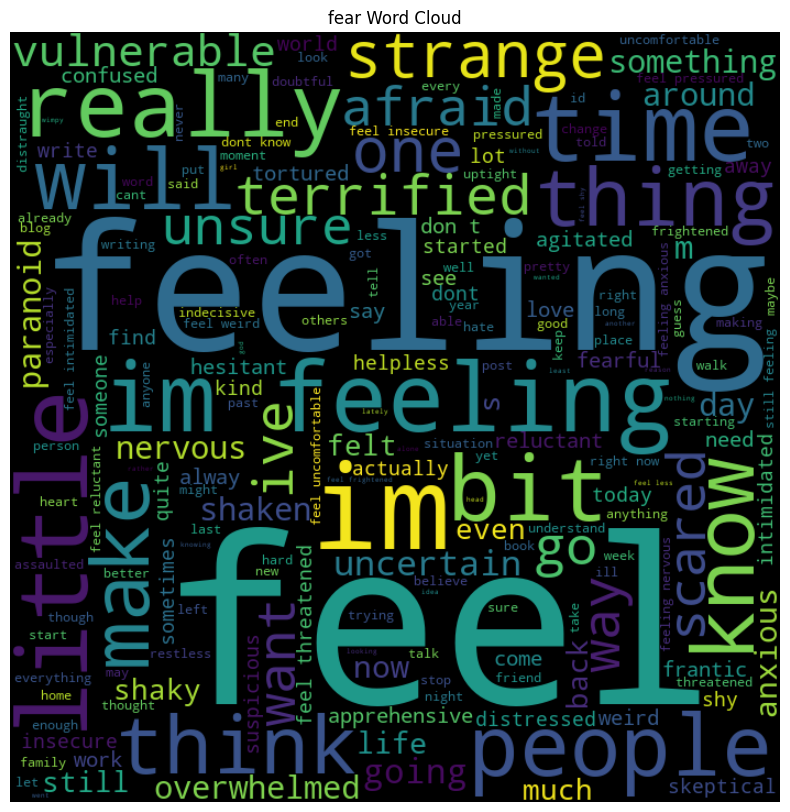

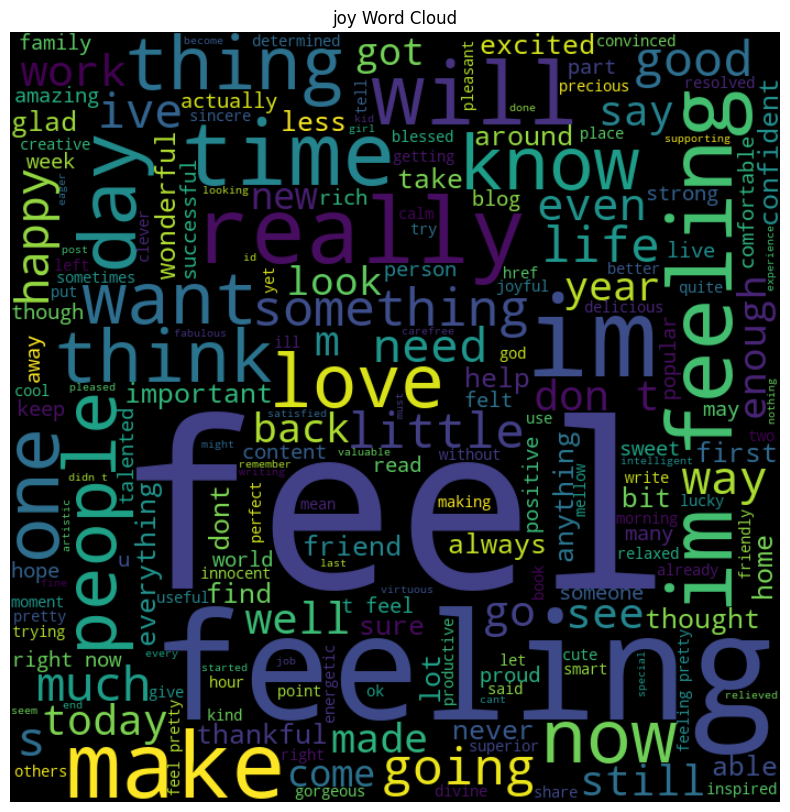

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Emotion'])
plt.title("Count of Comments by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='length', hue='Emotion', multiple='stack')
plt.title("Distribution of Comment Length by Emotion")
plt.xlabel("Comment Length")
plt.ylabel("Frequency")
plt.show()

for emotion in emotions_list:
    text = " ".join(data.loc[data['Emotion'] == emotion, 'Comment'])
    wc = WordCloud(width=700, height=700).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(emotion + " Word Cloud")
    plt.axis('off') 
    plt.show()

In [18]:
emotions_list

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

## Data Preprocessing

### labelling the Emotions

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#Category ni number ki link chesthadi
# Example - anger = 0 , sadness = 4 etc
label_enc = LabelEncoder()

In [21]:
data['num_labels'] = label_enc.fit_transform(data['Emotion'])

In [22]:
data.head()

,Comment,Emotion,length,num_labels
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0


### Applying ML

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import accuracy_score , classification_report

In [25]:
df = data.copy()

In [26]:
df.head(10)

,Comment,Emotion,length,num_labels
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
5,ive been feeling a little burdened lately wasn...,sadness,65,4
6,ive been taking or milligrams or times recomme...,surprise,122,5
7,i feel as confused about life as a teenager or...,fear,73,1
8,i have been with petronas for years i feel tha...,joy,98,2
9,i feel romantic too,love,19,3


In [27]:
###Data Cleaning And Preprocessing
#importing NLTK - Natural Lnguage Toolkit

In [28]:
import nltk

In [29]:
#Python Regex
import re

In [30]:
#Stop wods = iam , the , how ,what etc
stopwords = set(nltk.corpus.stopwords.words('english'))

In [31]:
#stemming - runnig , ran ni run , run chesthadi - present ttense ga chesthadi
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [32]:
def clean_and_stem(text):
    # Define a regex pattern to match non-alphabetic characters
    pattern = r'[^a-zA-Z\s]'
    
    cleaned_text = re.sub(pattern, '', text)
    
    words = cleaned_text.split()
    
    porter = PorterStemmer()
    
    stemmed_words = [porter.stem(word) for word in words]
    
    stemmed_text = " ".join(stemmed_words)
    
    return stemmed_text

In [33]:
df['clean_text'] = df['Comment'].apply(clean_and_stem)

In [34]:
df.head()

,Comment,Emotion,length,num_labels,clean_text
0,i didnt feel humiliated,sadness,23,4,i didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,i can go from feel so hopeless to so damn hope...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab a minut to post i feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,i am ever feel nostalg about the fireplac i wi...
4,i am feeling grouchy,anger,20,0,i am feel grouchi


In [35]:
x = df['clean_text']
y = df['num_labels']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((12799,), (3200,), (12799,), (3200,))

In [38]:
tfidf = TfidfVectorizer()

In [39]:
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Assuming clfs is your dictionary of classifiers
clfs = {
    "MNB": MultinomialNB(),
    "LG": LogisticRegression(),
    "RFC": RandomForestClassifier(),
    "SVM": SVC()  
}

# Train and evaluate each classifier
for name, clf in clfs.items():
    print(f"Training {name}...")
    
    # Train the classifier
    clf.fit(x_train_tfidf, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(x_test_tfidf)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score for {name}: {accuracy}")
    
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


Training MNB...
Accuracy Score for MNB: 0.6225
Classification Report for MNB:
              precision    recall  f1-score   support

           0       0.92      0.23      0.36       439
           1       0.88      0.12      0.22       375
           2       0.54      0.98      0.70      1027
           3       1.00      0.01      0.02       303
           4       0.71      0.88      0.79       950
           5       1.00      0.01      0.02       106

    accuracy                           0.62      3200
   macro avg       0.84      0.37      0.35      3200
weighted avg       0.74      0.62      0.53      3200

Training LG...


C:\Users\Vasanth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score for LG: 0.8134375
Classification Report for LG:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       439
           1       0.83      0.69      0.75       375
           2       0.75      0.94      0.83      1027
           3       0.82      0.46      0.59       303
           4       0.86      0.91      0.89       950
           5       0.80      0.41      0.54       106

    accuracy                           0.81      3200
   macro avg       0.82      0.69      0.74      3200
weighted avg       0.82      0.81      0.80      3200

Training RFC...
Accuracy Score for RFC: 0.82625
Classification Report for RFC:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       439
           1       0.82      0.79      0.80       375
           2       0.79      0.90      0.84      1027
           3       0.81      0.52      0.64       303
           4       0.89      0.87      0.88 

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
rf_y_pred = rf.predict(x_test_tfidf)

### You can put your desired sentence here :

In [46]:
additional_sentences = [
    "He promised me that he would be more careful in the future"
]


In [47]:
def predict_emotion(input_text):
    cleaned_text = clean_and_stem(input_text)
    input_vectorized = tfidf.transform([cleaned_text])

    predicted_label = rf.predict(input_vectorized)[0]
    predicted_emotion = label_enc.inverse_transform([predicted_label])[0]
    label = np.max(rf.predict_proba(input_vectorized))  

    return predicted_emotion, label

for sentence in additional_sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :", pred_emotion)
    print("Label (Probability) :", label)
    print("================================================================")

He promised me that he would be more careful in the future
Prediction : joy
Label (Probability) : 0.36


### Analysis :

* The model predicts a range of emotions across the sample sentences, reflecting the complexity and diversity of human emotional experiences.

* The associated probabilities offer insight into the model's confidence level in each prediction, highlighting variations in certainty across different emotional contexts.

* The model accurately identifies surprise and fear in specific sentences, demonstrating its ability to discern nuanced emotional states within the text.

* Some sentences present challenges for accurate emotion detection, particularly those with mixed or subtle emotional cues. This underscores the complexity inherent in understanding human emotions.
